In [156]:
from sklearn.datasets import load_boston

In [157]:
data = load_boston()

In [158]:
x, y = data['data'], data['target']

In [159]:
%matplotlib inline

In [160]:
import matplotlib.pyplot as plt

In [161]:
def draw_rm_and_price():
    plt.scatter(x[:, 5], y)

In [162]:
import random

In [163]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

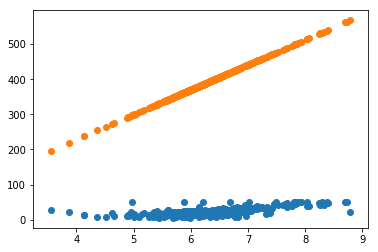

In [164]:
x_rm = x[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)

In [165]:
def loss(y,y_hat):
    return sum((y_i-y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(y)

## First-Method: Random generation: get best k and best b

In [166]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 36.62682207023792 best_b: 18.2748159121291, and the loss is: 51460.42061862882
When time is : 3, get best_k: -15.523918482795708 best_b: 81.0713947216405, and the loss is: 1865.2297542535607
When time is : 12, get best_k: 11.356571367098667 best_b: -43.65850010221912, and the loss is: 72.94326354879625
When time is : 908, get best_k: 8.11712094824668 best_b: -29.185765058227602, and the loss is: 44.57620242228653


## 方法一图像

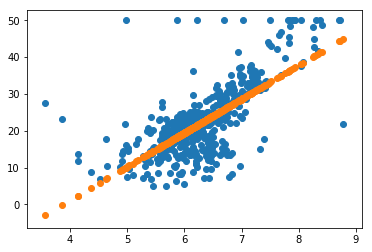

In [167]:
x_rm = x[:, 5]
k = 9.193791618649499
b = -35.70327768273354
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)  

## 2nd-Method: Direction Adjusting

In [168]:
trying_times = 2000

min_loss = float('inf')
best_k = random.random() * 200 - 100
best_b =  random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

scalar = 0.1

update_time = 0

next_direction = random.choice(direction)

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_random_k_and_b = [price(r, current_k, current_b) for r in x_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        next_direction = next_direction
        update_time += 1

        if update_time % 10 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)
        
        

When time is : 11, get best_k: -26.99473898065608 best_b: -0.12111896352216439, and the loss is: 37667.16761569389
When time is : 21, get best_k: -25.994738980656066 best_b: 0.8788810364778356, and the loss is: 34883.399062780096
When time is : 31, get best_k: -24.994738980656052 best_b: 1.8788810364778363, and the loss is: 32206.74769661329
When time is : 41, get best_k: -23.994738980656038 best_b: 2.878881036477837, and the loss is: 29637.21351719356
When time is : 51, get best_k: -22.994738980656024 best_b: 3.878881036477838, and the loss is: 27174.796524520887
When time is : 61, get best_k: -21.99473898065601 best_b: 4.878881036477835, and the loss is: 24819.496718595237
When time is : 71, get best_k: -20.994738980655995 best_b: 5.878881036477831, and the loss is: 22571.31409941659
When time is : 81, get best_k: -19.99473898065598 best_b: 6.878881036477828, and the loss is: 20430.248666985033
When time is : 91, get best_k: -18.994738980655967 best_b: 7.878881036477824, and the loss

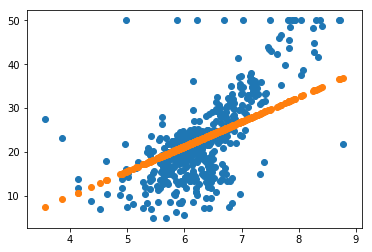

In [169]:
x_rm = x[:, 5]
k = 5.641762419855564
b = -12.580950337295315
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)  

## 导数

In [170]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [171]:
trying_times = 2000

# X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-02

update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    k_gradient = partial_k(x_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(x_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: -0.4947389806559659 best_b: 26.378881036477942, and the loss is: 302687.4851696677
When time is : 50, get best_k: -0.4947389806559659 best_b: 26.378881036477942, and the loss is: 48.40632963048952
When time is : 100, get best_k: -0.4947389806559659 best_b: 26.378881036477942, and the loss is: 48.292128880366256
When time is : 150, get best_k: -0.4947389806559659 best_b: 26.378881036477942, and the loss is: 48.1806419076397
When time is : 200, get best_k: -0.4947389806559659 best_b: 26.378881036477942, and the loss is: 48.07180422422436
When time is : 250, get best_k: -0.4947389806559659 best_b: 26.378881036477942, and the loss is: 47.96555287447885
When time is : 300, get best_k: -0.4947389806559659 best_b: 26.378881036477942, and the loss is: 47.86182639879081
When time is : 350, get best_k: -0.4947389806559659 best_b: 26.378881036477942, and the loss is: 47.76056479802579
When time is : 400, get best_k: -0.4947389806559659 best_b: 26.378881036477942, and

## 图像

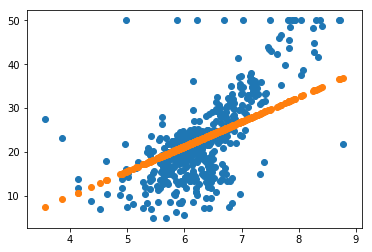

In [172]:
x_rm = x[:, 5]
k = 5.641762419855564
b = -12.580950337295315
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)  

## 绝对值求导

In [179]:
def abs_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i - y_hat_i > 0 :
            gradient += x_i
        elif y_i - y_hat_i < 0 :
            gradient += -x_i
        else:
            continue
    
    return -1 * gradient / n 


def abs_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        if y_i - y_hat_i > 0 :
            gradient += 1
        elif y_i - y_hat_i < 0 :
            gradient += -1
        else:
            continue
    
    return -1 / n * gradient


In [182]:
trying_times = 2000

# X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-02

update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    k_gradient = abs_k(x_rm, y, price_by_k_and_b)
    
    b_gradient = abs_b(x_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: -0.4947389806559659 best_b: 26.378881036477942, and the loss is: 13015.799460184144
When time is : 50, get best_k: -0.4947389806559659 best_b: 26.378881036477942, and the loss is: 8791.425868967772
When time is : 100, get best_k: -0.4947389806559659 best_b: 26.378881036477942, and the loss is: 5396.770673605782
When time is : 150, get best_k: -0.4947389806559659 best_b: 26.378881036477942, and the loss is: 2831.833874098079
When time is : 200, get best_k: -0.4947389806559659 best_b: 26.378881036477942, and the loss is: 1096.6154704446883
When time is : 250, get best_k: -0.4947389806559659 best_b: 26.378881036477942, and the loss is: 194.79283450682252
When time is : 300, get best_k: -0.4947389806559659 best_b: 26.378881036477942, and the loss is: 46.623868613366795
When time is : 350, get best_k: -0.4947389806559659 best_b: 26.378881036477942, and the loss is: 46.09576657425181
When time is : 450, get best_k: -0.4947389806559659 best_b: 26.378881036477942,

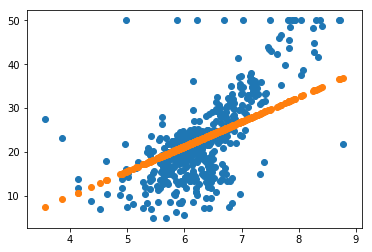

In [154]:
x_rm = x[:, 5]
k = 5.641762419855564
b = -12.580950337295315
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)  